# Problem statement: 

To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

# SKIN CANCER DATA FOR DETECTING MELANOMA


In [1]:
# importing all the necessary libraries
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

### - This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [2]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("C:/Users/HP/Desktop/cnn assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path("C:/Users/HP/Desktop/cnn assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test")

In [3]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing
 - Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset
 - Define some parameters for the loader:

In [4]:
batch_size = 32
img_height = 180
img_width = 180

- We will Use 80% of the images for training, and 20% for validation.

In [5]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'training',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [6]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'validation',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [7]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


## Visualize the data

#### - Visualizing one instance of all the nine classes present in the dataset

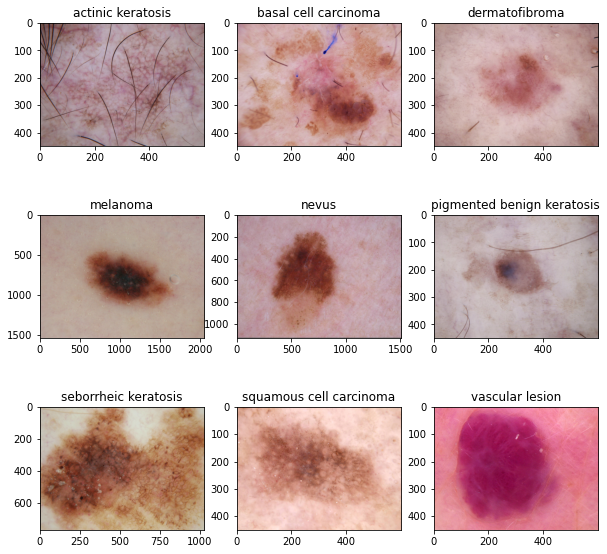

In [8]:
plt.figure(figsize=(10,10))
for i in range(9): 
  plt.subplot(3, 3, i + 1)
  image = plt.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [9]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Create the model

### Creating a CNN model, which can accurately detect 9 classes present in the dataset. 

- Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). 
- The RGB channel values are in the `[0, 255]` range. 
- This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [10]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

## Compile the model

- Choose an appropirate optimiser and loss function for model training 

In [11]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 32)      25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                    

# Train the Model

In [13]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


56/56 [==============================] - 143s 2s/step - loss: 2.0722 - accuracy: 0.2054 - val_loss: 1.9956 - val_accuracy: 0.2349
Epoch 2/20
56/56 [==============================] - 126s 2s/step - loss: 2.0222 - accuracy: 0.1936 - val_loss: 2.0263 - val_accuracy: 0.1924
Epoch 3/20
56/56 [==============================] - 126s 2s/step - loss: 2.0189 - accuracy: 0.2115 - val_loss: 1.9810 - val_accuracy: 0.1969
Epoch 4/20
56/56 [==============================] - 128s 2s/step - loss: 1.9801 - accuracy: 0.2433 - val_loss: 1.9615 - val_accuracy: 0.2461
Epoch 5/20
56/56 [==============================] - 130s 2s/step - loss: 1.9745 - accuracy: 0.2305 - val_loss: 2.0257 - val_accuracy: 0.2103
Epoch 6/20
56/56 [==============================] - 131s 2s/step - loss: 1.9747 - accuracy: 0.2288 - val_loss: 1.9458 - val_accuracy: 0.2998
Epoch 7/20
56/56 [==============================] - 131s 2s/step - loss: 1.9593 - accuracy: 0.2589 - val_loss: 1.9500 - val_accuracy: 0.2550
Epoch 8/20
56/56 [======

## Visualizing training results

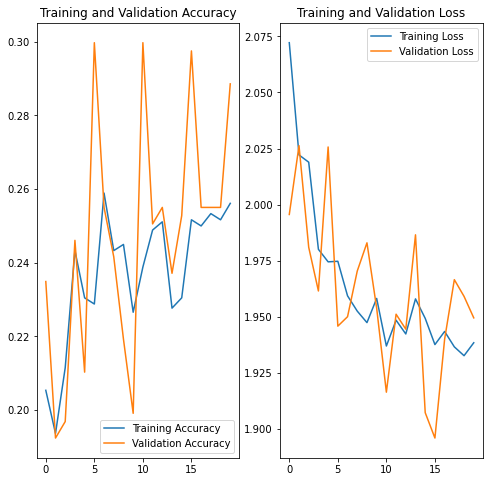

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

**Finding on the first base model**

- The model is overfitting because we can also see difference in loss functions in training & test around the 10-11th epoch

- The accuracy is just around 75-80% because there are enough features to remember the pattern.

- But again, it's too early to comment on the overfitting & underfitting debate



In [15]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
data_augument = keras.Sequential([
                             layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
                             layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),
                             layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])

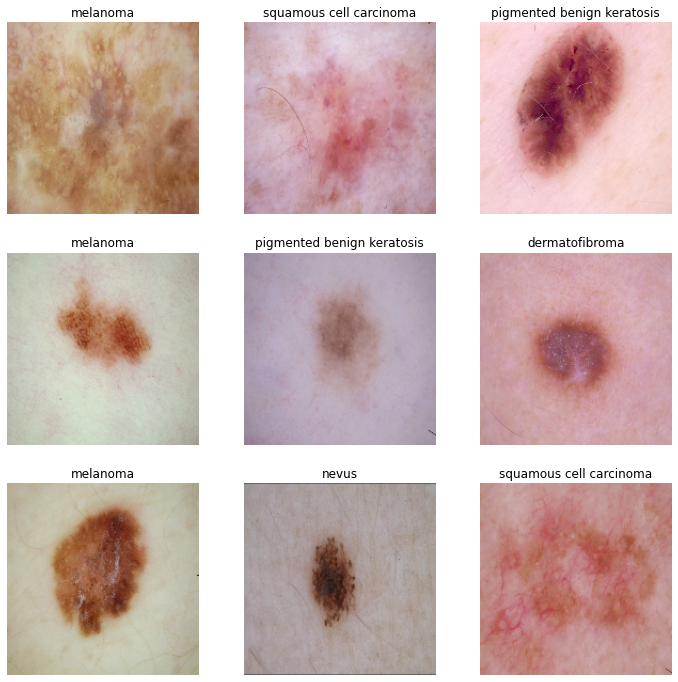

In [16]:
# Todo, visualize how your augmentation strategy works for one instance of training image.

plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_augument(images)[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

### Todo:
### Create the model, compile and train the model

In [17]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([ data_augument,
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
      
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))


### Compiling the model

In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [19]:
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 143s 3s/step - loss: 2.1012 - accuracy: 0.1864 - val_loss: 2.0386 - val_accuracy: 0.1499
Epoch 2/20
56/56 [==============================] - 143s 3s/step - loss: 2.0232 - accuracy: 0.2031 - val_loss: 2.0338 - val_accuracy: 0.2058
Epoch 3/20
56/56 [==============================] - 142s 3s/step - loss: 2.0205 - accuracy: 0.2015 - val_loss: 2.0397 - val_accuracy: 0.1924
Epoch 4/20
56/56 [==============================] - 142s 3s/step - loss: 2.0209 - accuracy: 0.1998 - val_loss: 2.0355 - val_accuracy: 0.1924
Epoch 5/20
56/56 [==============================] - 142s 3s/step - loss: 2.0296 - accuracy: 0.1987 - val_loss: 2.0330 - val_accuracy: 0.2081
Epoch 6/20
56/56 [==============================] - 139s 2s/step - loss: 2.0224 - accuracy: 0.2059 - val_loss: 2.0198 - val_accuracy: 0.2058
Epoch 7/20
56/56 [==============================] - 143s 3s/step - loss: 2.0195 - accuracy: 0.2026 - val_loss: 2.0239 - val_accuracy: 0.2058
Epoch 8/20
56

### Visualizing the results

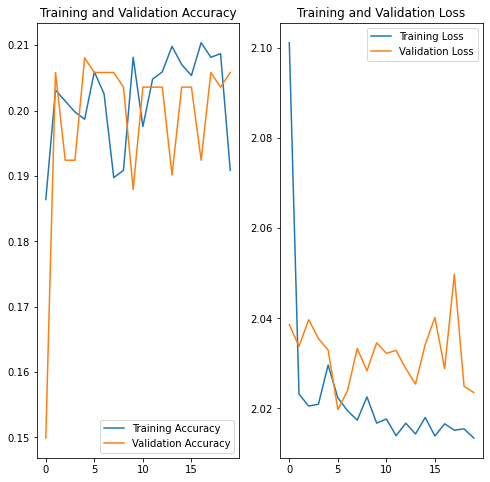

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

**Finding from Second Model**

- There is no improvement in accuracy but we can definitely see the overfitting problem has solved due to data augmentation 

- We can increase the epochs to increase the accuracy so it's too early for judgement 

### **Todo:** Find the distribution of classes in the training dataset.
### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [21]:
path_list=[]
lesion_list=[]
for i in class_names:
      
    for j in data_dir_train.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,C:\Users\HP\Desktop\cnn assignment\Skin cancer...,actinic keratosis
1,C:\Users\HP\Desktop\cnn assignment\Skin cancer...,actinic keratosis
2,C:\Users\HP\Desktop\cnn assignment\Skin cancer...,actinic keratosis
3,C:\Users\HP\Desktop\cnn assignment\Skin cancer...,actinic keratosis
4,C:\Users\HP\Desktop\cnn assignment\Skin cancer...,actinic keratosis
...,...,...
2234,C:\Users\HP\Desktop\cnn assignment\Skin cancer...,vascular lesion
2235,C:\Users\HP\Desktop\cnn assignment\Skin cancer...,vascular lesion
2236,C:\Users\HP\Desktop\cnn assignment\Skin cancer...,vascular lesion
2237,C:\Users\HP\Desktop\cnn assignment\Skin cancer...,vascular lesion


In [22]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,C:\Users\HP\Desktop\cnn assignment\Skin cancer...,actinic keratosis
1,C:\Users\HP\Desktop\cnn assignment\Skin cancer...,actinic keratosis
2,C:\Users\HP\Desktop\cnn assignment\Skin cancer...,actinic keratosis
3,C:\Users\HP\Desktop\cnn assignment\Skin cancer...,actinic keratosis
4,C:\Users\HP\Desktop\cnn assignment\Skin cancer...,actinic keratosis
...,...,...
2234,C:\Users\HP\Desktop\cnn assignment\Skin cancer...,vascular lesion
2235,C:\Users\HP\Desktop\cnn assignment\Skin cancer...,vascular lesion
2236,C:\Users\HP\Desktop\cnn assignment\Skin cancer...,vascular lesion
2237,C:\Users\HP\Desktop\cnn assignment\Skin cancer...,vascular lesion


<BarContainer object of 9 artists>

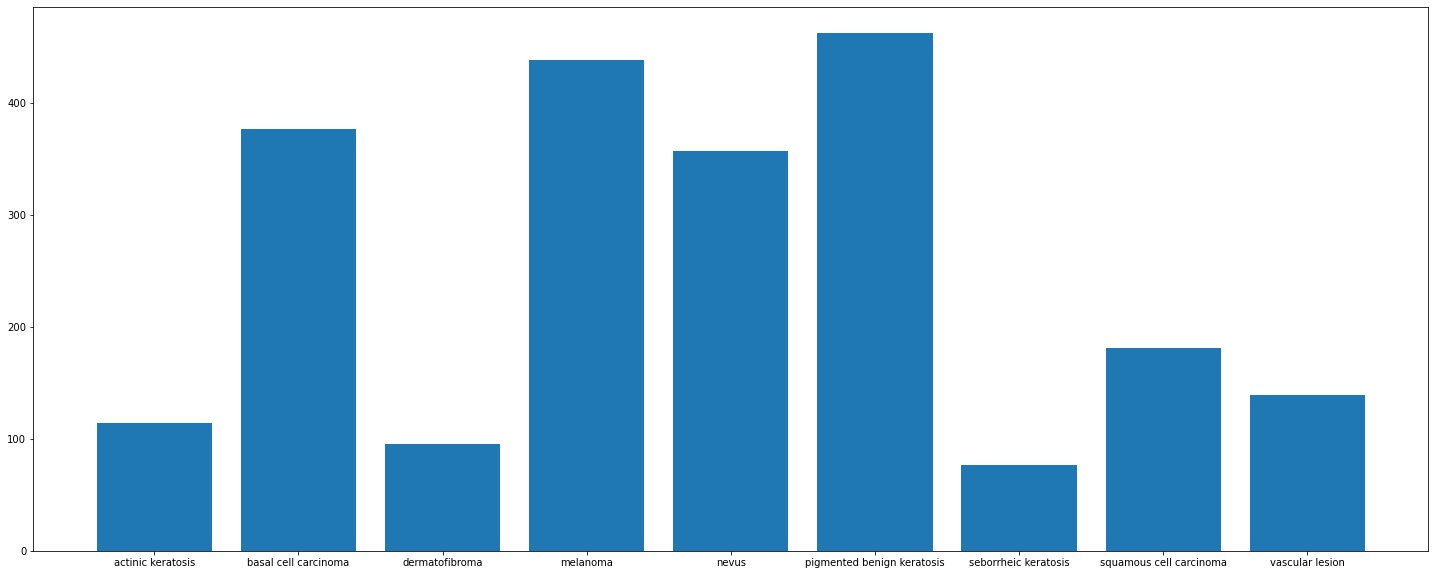

In [23]:
count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)

### **Todo:** Write your findings here: 
### - Which class has the least number of samples?
### - Which classes dominate the data in terms proportionate number of samples?

#### Answer-1 :- **squamous cell carcinoma** has least number of samples

#### Answer-2 :- **actinic keratosis and dermatofibroma** have proportionate number of classes. Melanoma and pigmented benign keratosis** have proprtionate number of classes

In [24]:
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

### **Todo:** Rectify the class imbalance
### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [25]:
# !pip install Augmentor

To use Augmentor, the following general procedure is followed:

- Instantiate a Pipeline object pointing to a directory containing your initial image data set.
- Define a number of operations to perform on this data set using your Pipeline object.
- Execute these operations by calling the Pipeline’s sample() method.

In [26]:
# path_to_training_dataset= "C:/Users/HP/Desktop/cnn assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline("C:/Users/HP/Desktop/cnn assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train",save_format='jpg')
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 2239 image(s) found.
Output directory set to C:/Users/HP/Desktop/cnn assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x24F85869C70>: 100%|█| 500/500 [00:07<00:00, 70.29 Samples/


Initialised with 2239 image(s) found.
Output directory set to C:/Users/HP/Desktop/cnn assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x24F8A1C4730>: 100%|█| 500/500 [00:06<00:


Initialised with 2239 image(s) found.
Output directory set to C:/Users/HP/Desktop/cnn assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x24F8586CA90>: 100%|█| 500/500 [00:06<00:00, 74.27 Samples/


Initialised with 2239 image(s) found.
Output directory set to C:/Users/HP/Desktop/cnn assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x24F8A1A3D00>: 100%|█| 500/500 [00:06<00:00, 82.69 Samples/


Initialised with 2239 image(s) found.
Output directory set to C:/Users/HP/Desktop/cnn assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x24F85572190>: 100%|█| 500/500 [00:06<00:00, 76.65 Samples


Initialised with 2239 image(s) found.
Output directory set to C:/Users/HP/Desktop/cnn assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x24F8A1EA820>: 100%|█| 500/500 [00:06<00:


Initialised with 2239 image(s) found.
Output directory set to C:/Users/HP/Desktop/cnn assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x24F96E7EE50>: 100%|█| 500/500 [00:07<00:00, 70.55 Samples/


Initialised with 2239 image(s) found.
Output directory set to C:/Users/HP/Desktop/cnn assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x24F85993610>: 100%|█| 500/500 [00:07<00:00, 67.40 Samples/


Initialised with 2239 image(s) found.
Output directory set to C:/Users/HP/Desktop/cnn assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x24FF7BF6490>: 100%|█| 500/500 [00:07<00:


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [27]:
data_dir_train1 = pathlib.Path("C:/Users/HP/Desktop/cnn assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output")
image_count_train1 = len(list(data_dir_train1.glob('*/*.jpg')))
print(image_count_train1)

4500


In [28]:
for i in class_names:
      
    for j in data_dir_train1.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
new_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
new_df

,Path,Label
0,C:\Users\HP\Desktop\cnn assignment\Skin cancer...,actinic keratosis
1,C:\Users\HP\Desktop\cnn assignment\Skin cancer...,actinic keratosis
2,C:\Users\HP\Desktop\cnn assignment\Skin cancer...,actinic keratosis
3,C:\Users\HP\Desktop\cnn assignment\Skin cancer...,actinic keratosis
4,C:\Users\HP\Desktop\cnn assignment\Skin cancer...,actinic keratosis
...,...,...
6734,C:\Users\HP\Desktop\cnn assignment\Skin cancer...,vascular lesion
6735,C:\Users\HP\Desktop\cnn assignment\Skin cancer...,vascular lesion
6736,C:\Users\HP\Desktop\cnn assignment\Skin cancer...,vascular lesion
6737,C:\Users\HP\Desktop\cnn assignment\Skin cancer...,vascular lesion


## Lets see the distribution of augmented data after adding new images to the original training data.

In [29]:
new_df['Label'].value_counts()

pigmented benign keratosis    1355
melanoma                      1310
basal cell carcinoma          1180
nevus                         1108
squamous cell carcinoma        518
vascular lesion                426
actinic keratosis              322
dermatofibroma                 285
seborrheic keratosis           235
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

### **Todo**: Train the model on the data created using Augmentor

In [30]:
batch_size = 32
img_height = 180
img_width = 180

In [31]:
import pathlib
data_dir_train1=pathlib.Path("C:/Users/HP/Desktop/cnn assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")

In [32]:
data_dir_train1

WindowsPath('C:/Users/HP/Desktop/cnn assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train')

### **Todo:** Create a training dataset

In [33]:
image_count_train1 = len(list(data_dir_train1.glob('*/*.jpg')))
print(image_count_train1)

2239


In [34]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


data_dir_train1=pathlib.Path("C:/Users/HP/Desktop/cnn assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train1,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 10 classes.
Using 5392 files for training.


### **Todo:** Create a validation dataset

In [35]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train1,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 10 classes.
Using 1347 files for validation.


### **Todo:** Create your model (make sure to include normalization)

In [36]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 10
model = Sequential([ 
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
      
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [37]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### **Todo:**  Train your model

In [38]:
epochs =30

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30


C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


169/169 [==============================] - 435s 3s/step - loss: 1.3560 - accuracy: 0.6634 - val_loss: 1.3449 - val_accuracy: 0.6726
Epoch 2/30
169/169 [==============================] - 429s 3s/step - loss: 1.3095 - accuracy: 0.6658 - val_loss: 1.3121 - val_accuracy: 0.6726
Epoch 3/30
169/169 [==============================] - 414s 2s/step - loss: 1.3099 - accuracy: 0.6669 - val_loss: 1.2987 - val_accuracy: 0.6726
Epoch 4/30
169/169 [==============================] - 420s 2s/step - loss: 1.3053 - accuracy: 0.6662 - val_loss: 1.3260 - val_accuracy: 0.6719
Epoch 5/30
169/169 [==============================] - 427s 3s/step - loss: 1.3060 - accuracy: 0.6664 - val_loss: 1.3128 - val_accuracy: 0.6726
Epoch 6/30
169/169 [==============================] - 433s 3s/step - loss: 1.3038 - accuracy: 0.6667 - val_loss: 1.3169 - val_accuracy: 0.6719
Epoch 7/30
169/169 [==============================] - 443s 3s/step - loss: 1.2982 - accuracy: 0.6660 - val_loss: 1.3084 - val_accuracy: 0.6726
Epoch 8/30

### **Todo:**  Visualize the model results

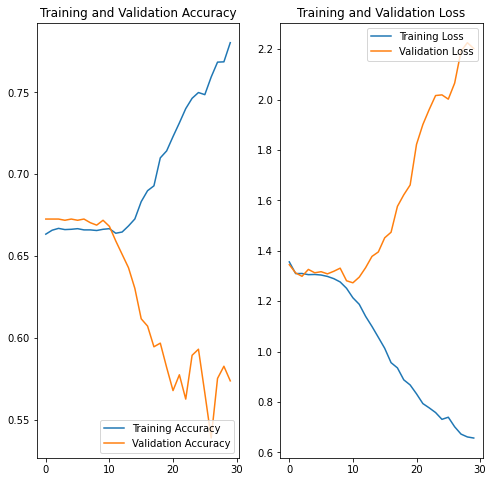

In [39]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?


- Accuracy on training data has increased by using Augmentor library

- Model is still overfitting

- The problem of overfitting can be solved by add more layer,neurons or adding dropout layers.

- The Model can be further improved by tuning the hyperparameter